## 1. Introduction to the DataSet

In this project, we look at 'import-85.data'. This file contains specifications of vehicles in 1985. For more info on the datasat, https://archive.ics.uci.edu/ml/datasets/automobile.

Here we are going to explore the fundamentals of Machine Learning using k-nearest neighbors algorithm from scikit-learn.

In [1]:
#Import libraries needed
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

As the dataset does not include column names, let's add them based on this link https://archive.ics.uci.edu/ml/datasets/automobile

In [66]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=cols)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Data Cleaning

As the k-nearest neighbors uses the distance formula to determine the nearest neighors, we can only use numeric columns. We need to perform some data cleaning.

Issues with the DF:
- Missing values with string '?'
- Many non numerical columns

In [23]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols=['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_cars=cars[continuous_values_cols]
num_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
#Replace ? by nan
num_cars=num_cars.replace('?',np.nan)
num_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [25]:
#Look for non numeric rows for each column
num_cars=num_cars.astype('float')
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [26]:
#We want to predict "price" column, remove rows with missing 'price' value
num_cars=num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [27]:
#Replace missing values in other columns using column mean
num_cars=num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

The k-nearest neighbors algorithm uses the euclidean distance to determine the closest neighbor.

$$ Distance = \sqrt{{(q_1-p_1)}^2+{(q_2-p_2)}^2+...{(q_n-p_n)}^2} $$

Where q and p represent two rows and the subscript representing a column. However, each column have different scaling. For example, if we take row 2, and row 3. The peak RPM has a difference of 500, while the difference in width is 0.7. The algorithm will give extra weight towards the difference in peak RPM.

That is why it is important to normalize the dataset into a unit vector. After normalization we'll have values from -1 to 1. For more information on feature scaling:https://en.wikipedia.org/wiki/Feature_scaling

$$ x' = \frac{x - mean(x)}{x(max) - x(min)}$$

In pandas this would be:

$$ df' = \frac{df - df.mean()}{df.max() - df.min()}$$

Where df is any dataframe

In [68]:
#Normalize all columns to range from 0 to 1 except target column
normalized_cars = (num_cars - num_cars.mean())/(num_cars.max() - num_cars.min())
normalized_cars["price"]=num_cars['price']
normalized_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


## Apply Machine Learning

Suppose we have a dataframe named 'train', and a row named 'test'. The idea behind k-nearest neighbors is to find k number of rows from 'train' with the lowest distance to 'test'. Then we can determine the average of the target column of 'train' of those five rows and return the result to 'test'.

We are going to write a function that uses the KNeighborsRegressor class from scikit-learn. This works a little bit differently, the class actually generates a model that fits the training dataset. It is a regression method using k-nearest neighbors. More information on this can be found in the documentation.
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

## 3. Univariate Model

In [69]:
#Returns the root mean squared error using KNN
def knn_train_test(features, target_col, df):
    #randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor()
    knn.fit(train_df[[features]], train_df[[target_col]])
    
    #test
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [70]:
features = normalized_cars.columns.drop('price')
rmse = {}
for item in features:
    rmse[item] = knn_train_test(item, 'price', normalized_cars)

results = pd.Series(rmse)
results.sort_values()

horsepower           4010.414152
curb-weight          4401.118255
highway-mpg          4652.697833
width                4908.609914
city-mpg             4973.940485
length               5429.900973
wheel-base           5460.787788
compression-rate     6610.812153
bore                 6806.695830
normalized-losses    7304.373172
peak-rpm             7678.470979
height               7842.199226
stroke               8005.611387
dtype: float64

Looks like horsepower column has the least amount of error.
Let's modify the function to include k value or the # of neighbors as a parameter. The we can loop through a list of k values and features in order to determine which k value and features are the most optimal for our machine learning model

In [72]:
def knn_train_test2(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
        
        #test
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [73]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = [1, 3, 5, 7, 9]
features = normalized_cars.columns.drop('price')
feature_k_rmse = {}

for item in features:
    feature_k_rmse[item] = knn_train_test2(item, 'price', normalized_cars, k)
    
feature_k_rmse

{'normalized-losses': {1: 7829.153502413683,
  3: 7515.021862294153,
  5: 7304.373172258108,
  7: 7634.134919298568,
  9: 7682.244506601594},
 'wheel-base': {1: 4493.734068810494,
  3: 5208.39331165465,
  5: 5460.78778823338,
  7: 5448.173408324034,
  9: 5738.621574471594},
 'length': {1: 4611.990241761035,
  3: 5129.672039752984,
  5: 5429.900972639673,
  7: 5311.883616635263,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4648.149766156945,
  5: 4908.609914413773,
  7: 4781.944236558163,
  9: 4719.070452207012},
 'height': {1: 8942.012951995952,
  3: 8378.23385277286,
  5: 7842.199225717336,
  7: 7709.0699416548505,
  9: 7777.1734491607085},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.6701276238755,
  9: 4633.425879994758},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6806.695830075582,
  7: 6939.105845651802,
  9: 6915.297375013411},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8005

normalized-losses
average_rmse: 7592.985592573222
wheel-base
average_rmse: 5269.942030298831
length
average_rmse: 5173.30027712448
width
average_rmse: 4723.406333457191
height
average_rmse: 8129.737884260341
curb-weight
average_rmse: 4735.110369350003
bore
average_rmse: 7249.585404944475
stroke
average_rmse: 7990.349766848265
compression-rate
average_rmse: 7166.0735987331045
horsepower
average_rmse: 4206.276166151255
peak-rpm
average_rmse: 8122.4771540352285
city-mpg
average_rmse: 5240.0943656464315
highway-mpg
average_rmse: 5085.212418997615


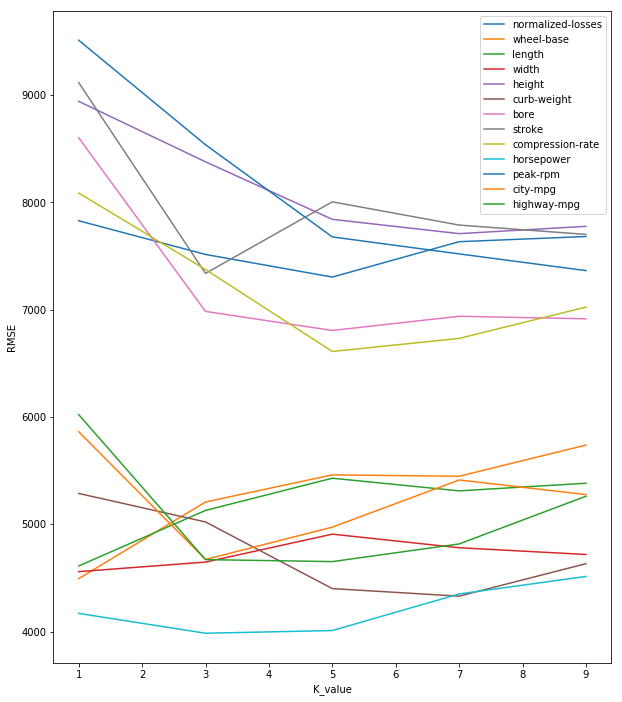

In [74]:

best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

We know which feature has the lowest amount of error. Let's apply the function to multiple features at once

In [75]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'compression-rate',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

## 4. Multivariate Model

In [76]:
def knn_train_test3(features, target_col, df):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    #test
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [77]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', normalized_cars)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', normalized_cars)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', normalized_cars)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', normalized_cars)


k_rmse_features
    

{'best_two_rmse': 3635.0424706141075,
 'best_three_rmse': 3214.9121121904577,
 'best_four_rmse': 3404.6909417321376,
 'best_five_rmse': 3533.7489988020734}

## 4.Multivariate Model (with 3-4-5 best features)

Now, let's try varying the K values. We can further tune our machine learning model by finding the optimal k value to use

In [78]:
def knn_train_test4(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        #test
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [80]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = list(range(1,25))
features = [best_three_features, best_four_features, best_five_features]
feature_k_rmse2 = {}
feature_k_rmse2["best_three_features"] = knn_train_test4(best_three_features, 'price', normalized_cars, k)
feature_k_rmse2["best_four_features"] = knn_train_test4(best_four_features, 'price', normalized_cars, k)
feature_k_rmse2["best_five_features"] = knn_train_test4(best_five_features, 'price', normalized_cars, k)

feature_k_rmse2

{'best_three_features': {1: 2879.8872399542806,
  2: 2824.3660223522415,
  3: 2869.933838736334,
  4: 3141.137015378538,
  5: 3214.9121121904577,
  6: 3280.710541238062,
  7: 3421.1652350874347,
  8: 3379.778228190607,
  9: 3464.5878589864906,
  10: 3575.3981609613693,
  11: 3617.9433332156923,
  12: 3630.7516137575535,
  13: 3632.7823295462845,
  14: 3754.4036203105343,
  15: 3837.677054164043,
  16: 3841.760205882436,
  17: 3858.9773285906977,
  18: 3844.3626311824146,
  19: 3875.9053428113702,
  20: 3869.5372272718314,
  21: 3901.5634407576663,
  22: 3926.0570825223363,
  23: 4019.34604419612,
  24: 4048.5637998085253},
 'best_four_features': {1: 2870.800286876242,
  2: 2924.256000834373,
  3: 3217.2983830519292,
  4: 3392.3729838615423,
  5: 3404.6909417321376,
  6: 3532.1939129716366,
  7: 3523.454893817346,
  8: 3405.9189129672363,
  9: 3400.2247346580157,
  10: 3549.4612599577126,
  11: 3539.83054253496,
  12: 3562.1876094096256,
  13: 3675.4563993723814,
  14: 3770.166928307887

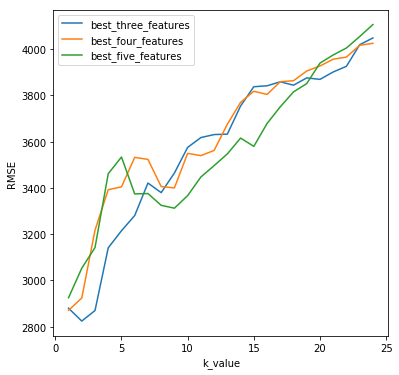

In [81]:
plt.figure(figsize=(6, 6))

for key, value in feature_k_rmse2.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()

From the chart above, we can see that choosing the best three features with a K value of 2 will give us the RMSE of 2824. That is it for now though, the goal of this project is to explore the fundamentals of machine learning.

